In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

pd.set_option('max_columns', 60)

In [9]:
df = pd.read_csv('chiefs_data_clean2019.csv')

del[df['game_time']]


<AxesSubplot:>

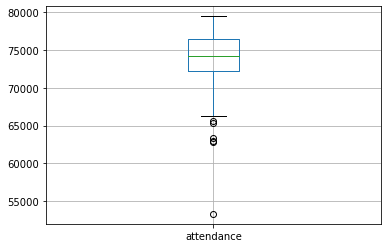

In [10]:
df.boxplot('attendance')

<AxesSubplot:>

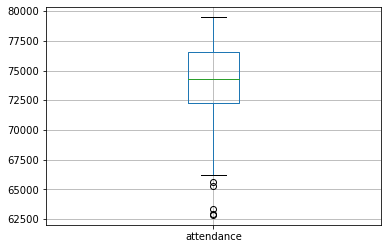

In [11]:
#take out big outlier

df = df[df['attendance'] > 55000]

df.boxplot('attendance')

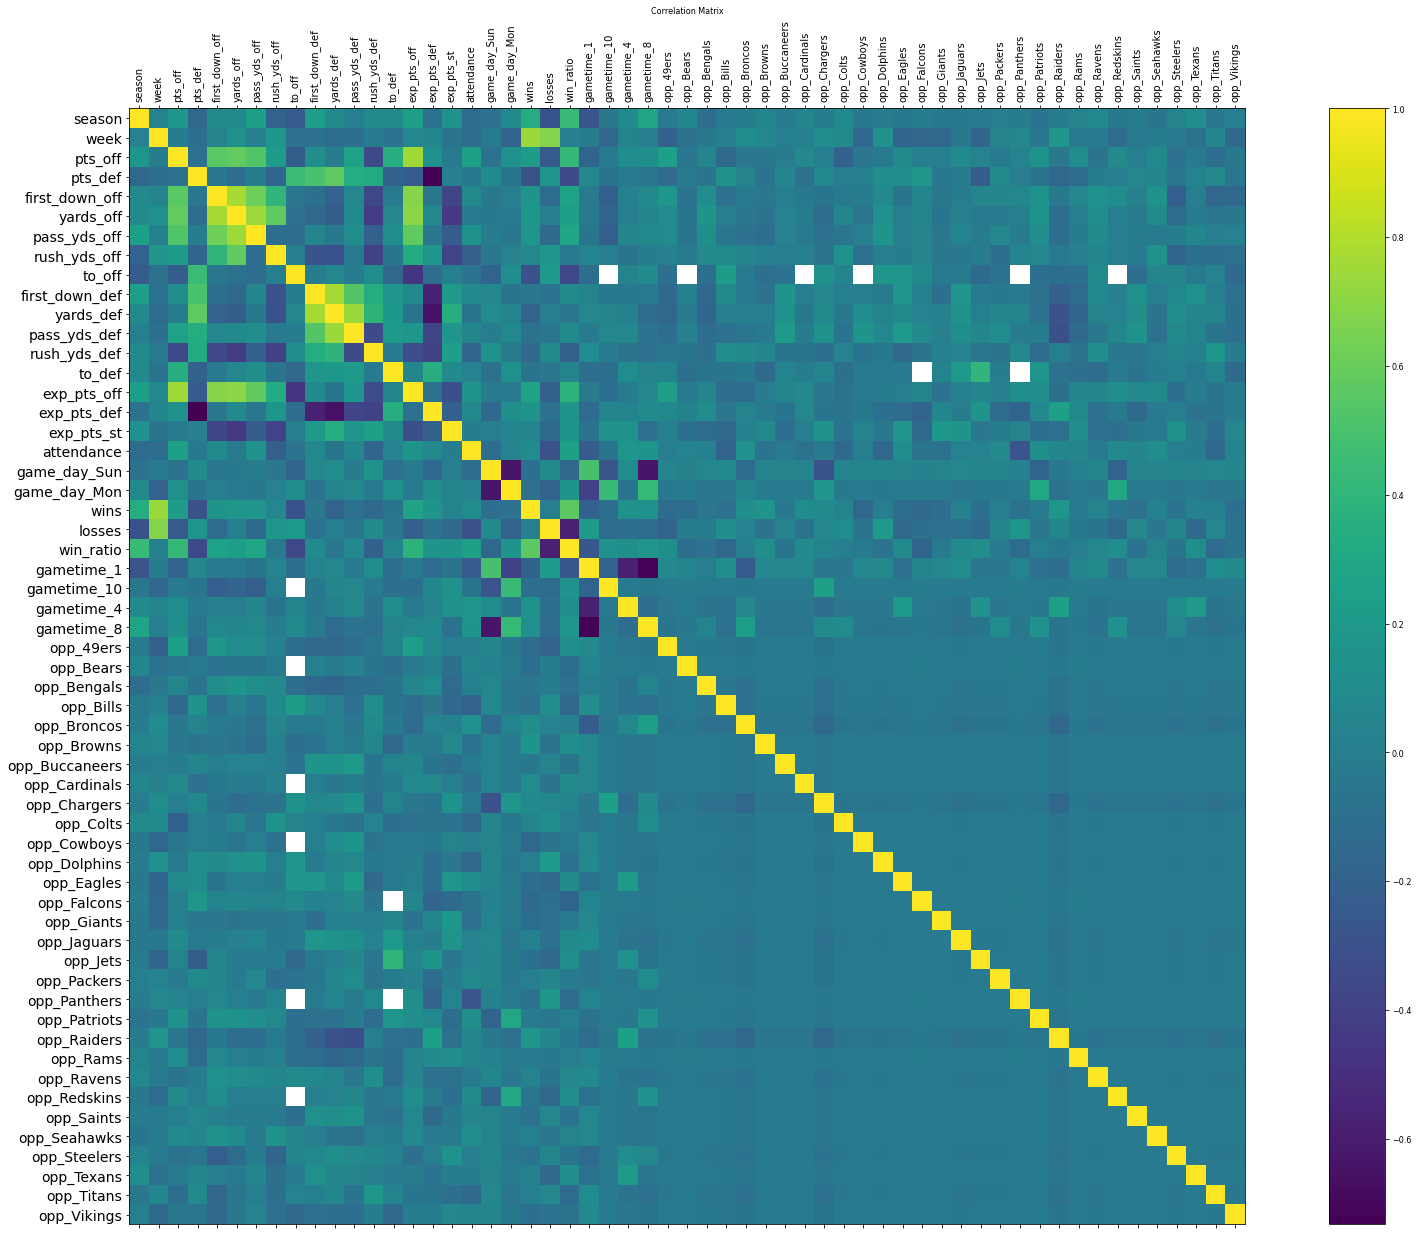

In [12]:
f = plt.figure(figsize=(30, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=8);

In [13]:
df.tail(10)

,season,week,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
109,2018,15,28.0,29.0,22.0,294.0,234.0,60.0,NaN,30.0,407.0,288.0,119.0,2.0,17.10,-21.67,4.16,75091,0,0,11,3,0.785714,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110,2018,17,35.0,3.0,18.0,409.0,310.0,99.0,1.0,20.0,292.0,165.0,127.0,4.0,17.34,22.66,-9.26,77550,1,0,12,4,0.750000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
111,2019,3,33.0,28.0,27.0,503.0,363.0,140.0,NaN,29.0,452.0,249.0,203.0,NaN,25.98,-14.50,-4.79,73390,1,0,3,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
112,2019,5,13.0,19.0,18.0,324.0,288.0,36.0,1.0,25.0,331.0,151.0,180.0,1.0,-1.57,-4.31,-1.09,73352,1,0,4,1,0.800000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
113,2019,6,24.0,31.0,20.0,309.0,256.0,53.0,2.0,35.0,472.0,280.0,192.0,3.0,6.10,-16.92,1.87,73323,1,0,4,2,0.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
114,2019,8,24.0,31.0,21.0,337.0,249.0,88.0,1.0,21.0,374.0,256.0,118.0,NaN,11.40,-17.67,0.68,73558,1,0,5,3,0.625000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
115,2019,9,26.0,23.0,17.0,377.0,230.0,147.0,1.0,17.0,308.0,212.0,96.0,NaN,7.56,-3.06,-0.23,73615,1,0,6,3,0.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
116,2019,13,40.0,9.0,22.0,259.0,163.0,96.0,NaN,19.0,332.0,210.0,122.0,3.0,14.17,3.44,11.19,73548,1,0,8,4,0.666667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
117,2019,15,23.0,3.0,27.0,419.0,327.0,92.0,1.0,15.0,251.0,199.0,52.0,1.0,15.31,9.67,-4.87,73257,1,0,10,4,0.714286,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
118,2019,17,31.0,21.0,16.0,336.0,174.0,162.0,1.0,25.0,366.0,258.0,108.0,2.0,13.59,-9.18,7.29,73680,1,0,12,4,0.750000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


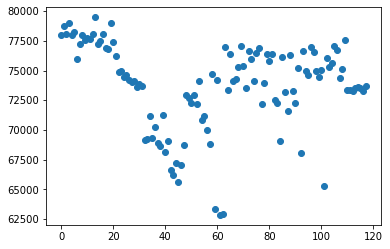

In [14]:
plt.scatter(range(len(df)), df['attendance'])
plt.show()

In [15]:
#take out to_off and to_def

del[df['to_off'], 
   df['to_def']]

In [16]:
#change around order of dataframe so attendance is to the front

target = ['attendance']
predictors = []

for x in list(df.columns):
  if x not in target:
    predictors.append(x)


In [17]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df[predictors] = scale.fit_transform(df[predictors])

df.head()

,season,week,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,-1.613121,-1.707579,0.489053,-1.320294,0.722292,0.604282,-0.324436,1.307016,-0.136606,0.586189,1.478857,-1.192610,0.832037,1.123121,-0.865345,78014,0.336463,-0.210352,-1.125486,-1.335640,1.584037,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,6.191392,-0.161515,-0.09245,-0.131306,-0.381616,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
1,-1.613121,-1.095134,0.908749,1.714668,-0.149631,0.154643,-0.050766,0.294702,1.135985,0.665075,1.950748,-1.723867,-0.505219,-0.763228,2.043018,78742,0.336463,-0.210352,-0.827043,-0.663548,-0.137970,-1.88108,-0.09245,3.286335,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,7.615773,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,-0.131306,-0.381616,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
2,-1.613121,-0.686838,0.593977,0.096021,-0.367611,-0.832066,-0.522086,-0.605132,1.348084,0.691371,0.993484,-0.386566,0.391864,0.185237,-0.274025,78083,0.336463,-0.210352,-0.528599,-0.663548,0.206431,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,-0.131306,-0.381616,-0.09245,-0.187317,7.615773,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
3,-1.613121,-0.074393,0.489053,0.298352,-0.367611,-0.245037,-0.081173,-0.267694,0.287591,-1.083575,-0.826666,-0.386566,0.206924,0.317984,-0.157905,79033,0.336463,-0.210352,0.068288,-0.327502,0.292531,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,-0.131306,2.620433,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
4,-1.613121,0.538052,0.384129,-0.409806,0.940272,0.991472,1.454420,-0.305188,0.075493,-0.518222,0.117116,-0.881184,0.579314,0.161189,-0.549141,78025,0.336463,-0.210352,0.665175,0.008544,0.331668,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,7.615773,-0.381616,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515


In [18]:
#preform train_test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
df[predictors], df[target], test_size = .2, random_state = 123
)

x_test = pd.DataFrame(x_test, columns = list(df[predictors].columns))
x_train = pd.DataFrame(x_train, columns = list(df[predictors].columns))

In [19]:
print(y_train.mean() / y_test.mean() - 1)

attendance   -0.003719
dtype: float64


In [20]:
x_test.shape

(24, 54)

In [21]:
#model to beat: Average of attendance

aa = []
for x in df['attendance']:
  aa.append(df['attendance'].mean())
  
np.sqrt(mean_squared_error(df['attendance'], aa))

3648.7494219955793

In [63]:
from sklearn.linear_model import LassoLars

mod = LassoLars(alpha = 18)

mod_fit = mod.fit(x_train, y_train)

mod_predict = mod.predict(x_test)

print('RMSE =', np.sqrt(mean_squared_error(y_test, mod_predict)))
print('R2 score = ', r2_score(y_test,mod_predict))

RMSE = 3047.593875786653
R2 score =  0.2219518050429069


In [58]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10,12,14,16,18,20,25]}

clf = GridSearchCV(estimator = mod, cv = 7, param_grid = params, 
             scoring = 'r2')

clf_fit = clf.fit(x_train, y_train)

In [59]:
print(clf_fit.best_params_)

{'alpha': 25}


In [45]:
coefs = pd.DataFrame(mod_fit.coef_).transpose()

coefs.columns = list(x_train.columns)

coefs = coefs.transpose().reset_index()

coefs.columns = ['colum','coefficient']

coefs['absolute'] = abs(coefs['coefficient'])

coefs.sort_values('absolute', ascending = False)

,colum,coefficient,absolute
0,season,-1117.033265,1117.033265
7,rush_yds_off,-1110.099523,1110.099523
42,opp_Panthers,-690.711940,690.711940
2,pts_off,690.181168,690.181168
20,gametime_1,-531.480253,531.480253
18,losses,-421.233583,421.233583
12,exp_pts_off,324.105270,324.105270
49,opp_Seahawks,285.361189,285.361189
41,opp_Packers,279.695895,279.695895
28,opp_Broncos,272.215895,272.215895


In [47]:
#run a gridsearch

from sklearn.model_selection import GridSearchCV

params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10,20]}

clf = GridSearchCV(estimator = mod_fit, cv = 5, param_grid = params, 
             scoring = 'neg_mean_squared_error')

clf_fit = clf.fit(x_train, y_train)

clf_fit.best_estimator_



LassoLars(alpha=20)

In [66]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha = 22.0, normalize = False)


ridge_fit = ridge.fit(x_train, y_train)

ridge_predict = ridge_fit.predict(x_test)

print('RMSE of Ridge Regression =', np.sqrt(mean_squared_error(y_test, ridge_predict)))

mean_list = []
for row in range(len(y_test)) :
    mean_list.append(df['attendance'].mean())

print("RMSE of Using Attendance Mean as Predictor", np.sqrt(mean_squared_error(y_test, mean_list)))

mean_rmse = np.sqrt(mean_squared_error(y_test, mean_list))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predict))

improvement = ((mean_rmse / ridge_rmse) - 1) * 100
print("Ridge delta:", improvement)

print("RMSE of LassoLars Regression:", np.sqrt(mean_squared_error(y_test, mod_predict)))
print("LassoLars Delta:", ((mean_rmse / np.sqrt(mean_squared_error(y_test, mod_predict))) - 1) * 100)

print("R Squared of Ridge Regression:", r2_score(y_test, ridge_predict))
print("R Squared of LassoLars", r2_score(y_test, mod_predict))

RMSE of Ridge Regression = 3050.1249289155885
RMSE of Using Attendance Mean as Predictor 3461.9878272780497
Ridge delta: 13.503148492638651
RMSE of LassoLars Regression: 3047.593875786653
LassoLars Delta: 13.597413841253125
R Squared of Ridge Regression: 0.22065891684900207
R Squared of LassoLars 0.2219518050429069


In [65]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10,12,14,16,18,20,22,25,30]}

clf = GridSearchCV(estimator = ridge, cv = 10, param_grid = params, 
             scoring = 'neg_mean_squared_error')

print(clf_fit.best_params_)

clf_fit = clf.fit(x_train, y_train)

{'alpha': 22}


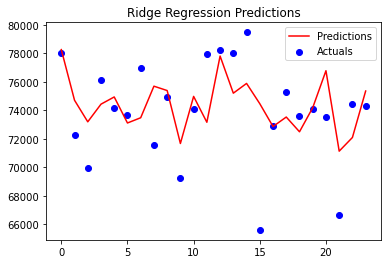

In [56]:
plt.scatter(range(len(y_test)), y_test, color = 'blue', label = "Actuals")
plt.plot(range(len(y_test)), ridge_predict, color = 'red', label = "Predictions")
plt.title("Ridge Regression Predictions")
plt.legend()


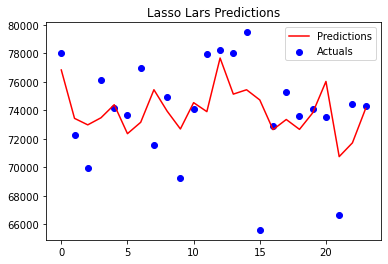

In [57]:
plt.scatter(range(len(y_test)), y_test, color = 'blue', label = "Actuals")
plt.plot(range(len(y_test)), mod_predict, color = 'red', label = "Predictions")
plt.title("Lasso Lars Predictions")

plt.legend()

Results:

It looks like we are getting some lift in the model. If we use the attendance mean as a benchmark, the ridge model had an 8% RMSE improvement. R^2 was fairly low at .14, so there might be different models to try. I am interested in working with tensorflow regression models to see if I can increase r^2 (though this might not be possible with how little data I have).

There is a big outlier at 55,000. Will taking this out improve proformance?
 UPDATE:
 Taking out the outlier below 55,000 on attendance did have a positive effect on the model. we improved our delta from our benchmark up to 14.7 percent. R^2 also went up to 22%

 Since there aren't many datapoints in this analysis, there is no surprise that taking out the low outlier had a dramatic effect on the model performance. 


The best result was the Ridge model with a 26% R-Squared and an RMSE of 2968. Compared to the RMSE of average attendance, the LassoLars model had a delta of 18.5%

 